# Average AirPlane Fare Analysis in Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
data = pd.read_csv('air.csv',header=None,sep=' ')
data.columns= ["City1","City2","Average Fare","Distance","Average weekly passengers","market leading airline","market share","Average fare","Low price airline","market share","price"]                  
print(data.head())     
data.describe()
#to reduce redundancy converted all tabs to spaces in data and mentioned space as seperator

  City1 City2  Average Fare  Distance  Average weekly passengers  \
0   CAK   ATL        114.47       528                     424.56   
1   CAK   MCO        122.47       860                     276.84   
2   ALB   ATL        214.42       852                     215.76   
3   ALB   BWI         69.40       288                     606.84   
4   ALB   ORD        158.13       723                     313.04   

  market leading airline  market share  Average fare Low price airline  \
0                     FL         70.19        111.03                FL   
1                     FL         75.10        123.09                DL   
2                     DL         78.89        223.98                CO   
3                     WN         96.97         68.86                WN   
4                     UA         39.79        161.36                WN   

   market share   price  
0         70.19  111.03  
1         17.23  118.94  
2          2.77  167.12  
3         96.97   68.86  
4         15.34 

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


# Cap outliers

In [3]:
data_out = data.drop(columns=['City1','City2','Low price airline','market leading airline'])
data_out = data_out.loc[:,~data_out.columns.duplicated()]
data_out.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,price
0,114.47,528,424.56,70.19,111.03,111.03
1,122.47,860,276.84,75.10,123.09,118.94
2,214.42,852,215.76,78.89,223.98,167.12
3,69.40,288,606.84,96.97,68.86,68.86
4,158.13,723,313.04,39.79,161.36,145.42


In [4]:
Q1 = data_out.quantile(0.25)

Q3 = data_out.quantile(0.75)

IQR = Q3 - Q1


#data_out.shape
df = data_out[~((data_out < (Q1 - 1.5 * IQR)) |(data_out > (Q3 + 1.5 * IQR))).any(axis=1)]


In [5]:
df.shape

(885, 6)

In [6]:
df.head(10)

,Average Fare,Distance,Average weekly passengers,market share,Average fare,price
0,114.47,528,424.56,70.19,111.03,111.03
1,122.47,860,276.84,75.10,123.09,118.94
2,214.42,852,215.76,78.89,223.98,167.12
3,69.40,288,606.84,96.97,68.86,68.86
4,158.13,723,313.04,39.79,161.36,145.42
5,135.17,1204,199.02,40.68,137.97,127.69
6,152.85,2237,237.17,59.94,148.59,148.59
7,190.73,2467,191.95,17.89,205.06,174.00
8,129.35,1073,550.54,76.84,127.69,127.69
9,134.17,1130,202.93,35.40,132.91,124.78


In [7]:
X=df.loc[:,['Distance','price','Average fare','market share','Average weekly passengers']]

In [8]:
X.head()

,Distance,price,Average fare,market share,Average weekly passengers
0,528,111.03,111.03,70.19,424.56
1,860,118.94,123.09,75.10,276.84
2,852,167.12,223.98,78.89,215.76
3,288,68.86,68.86,96.97,606.84
4,723,145.42,161.36,39.79,313.04


In [9]:
Y= df['Average Fare']
Y.head()

0    114.47
1    122.47
2    214.42
3     69.40
4    158.13
Name: Average Fare, dtype: float64

# Dropping the independent variables which has less than 0.1 correlation with the dependent variable.

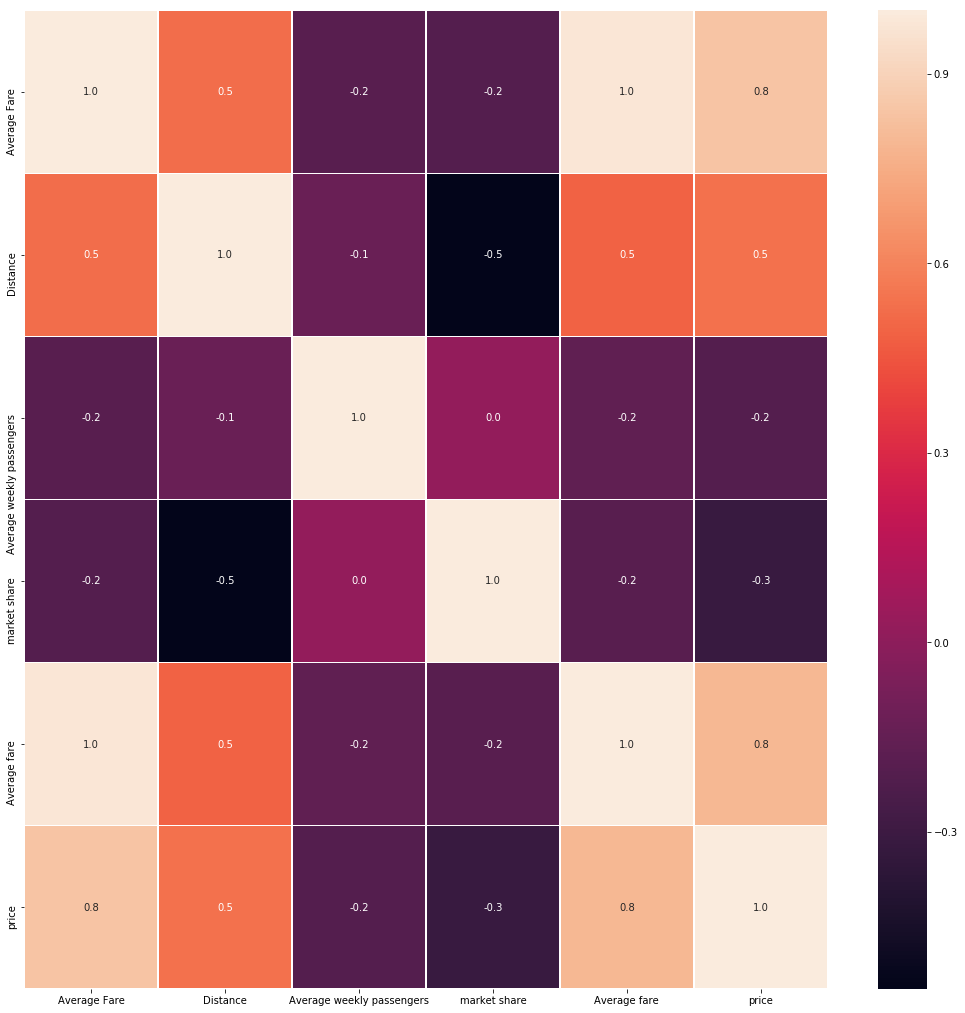

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax= plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

In [11]:
corr_matrix= df.corr().abs()

#Select upper triangle of correlation matrix
upper= corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
#Finding column index where correlation is less than 0.1
to_drop=[column for column in upper.columns if any (upper[column] < 0.1)]

In [12]:
print('Column to be dropped',to_drop)

Column to be dropped ['market share']


In [13]:
#dropping market share
df = df.drop('market share',axis=1)
df.head()

,Average Fare,Distance,Average weekly passengers,Average fare,price
0,114.47,528,424.56,111.03,111.03
1,122.47,860,276.84,123.09,118.94
2,214.42,852,215.76,223.98,167.12
3,69.40,288,606.84,68.86,68.86
4,158.13,723,313.04,161.36,145.42


# Scatter Plot of Independent Variable vs Dependent Variable

Text(0,0.5,'Average Fare')

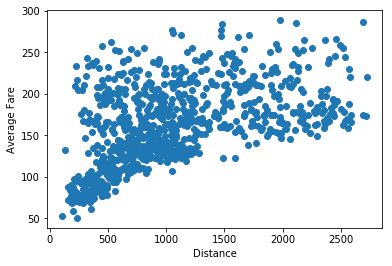

In [14]:
plt.scatter(df.Distance, df['Average Fare'], )
plt.xlabel('Distance')
plt.ylabel('Average Fare')

Text(0,0.5,'Average Fare')

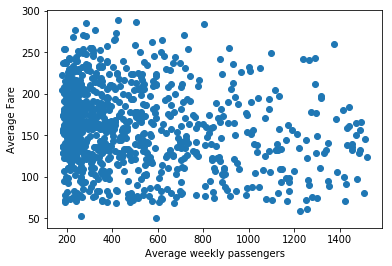

In [15]:
plt.scatter(df['Average weekly passengers'], df['Average Fare'], )
plt.xlabel('Average weekly passengers')
plt.ylabel('Average Fare')

Text(0,0.5,'Average Fare')

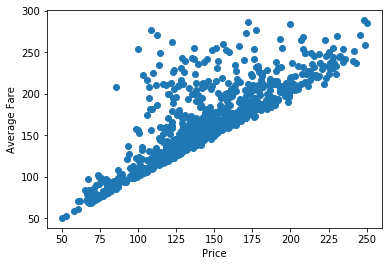

In [16]:
plt.scatter(df.price, df['Average Fare'], )
plt.xlabel('Price')
plt.ylabel('Average Fare')

In [17]:
#Observation: Price and Average Fare has line

#  Splitting test train data

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)  

print(X_train.shape)
print(X_test.shape)

(708, 5)
(177, 5)


In [20]:
from sklearn.linear_model import LinearRegression  
reg1 = LinearRegression()  
lm = reg1.fit(X_train, y_train)  

#   Model Evaluation -RSquare
Print the coefficients & intercepts of the linear regression model 

In [21]:
r2 = reg1.score(X_train,y_train)
print(r2)


0.9734928130061087


In [22]:
coeff_df = pd.DataFrame(reg1.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients\n',coeff_df)

Coefficients
                            Coefficient
Distance                      0.002958
price                         0.197793
Average fare                  0.756215
market share                  0.068277
Average weekly passengers    -0.003898


In [23]:
print('Regression coefficient',reg1.coef_)

Regression coefficient [ 0.00295763  0.19779262  0.75621532  0.06827665 -0.00389837]


#  Accuracy

In [24]:
# R-Square and Adjusted R-Square scores
r2 = reg1.score(X_train,y_train)
print(r2)

0.9734928130061087


In [25]:
print('Accracy of the model predicted in linear regression is ', r2*100)

Accracy of the model predicted in linear regression is  97.34928130061087
